In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.neighbors import NearestNeighbors
import folium


In [3]:
df=pd.read_csv('/content/Dataset .csv')

In [4]:
print(df)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [5]:
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [6]:
print(df.tail())

      Restaurant ID           Restaurant Name  Country Code       City  \
9546        5915730               Naml۱ Gurme           208  ��stanbul   
9547        5908749              Ceviz A��ac۱           208  ��stanbul   
9548        5915807                     Huqqa           208  ��stanbul   
9549        5916112               A���k Kahve           208  ��stanbul   
9550        5927402  Walter's Coffee Roastery           208  ��stanbul   

                                                Address     Locality  \
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...     Karak�_y   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...    Ko��uyolu   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...  Kuru�_e��me   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...  Kuru�_e��me   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...         Moda   

            Locality Verbose  Longitude   Latitude  \
9546     Karak�_y, ��stanbul  28.977392  41.022793   
9547    Ko��uy

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Map saved as restaurant_map.html


<ipython-input-8-6566c0266d0b>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")


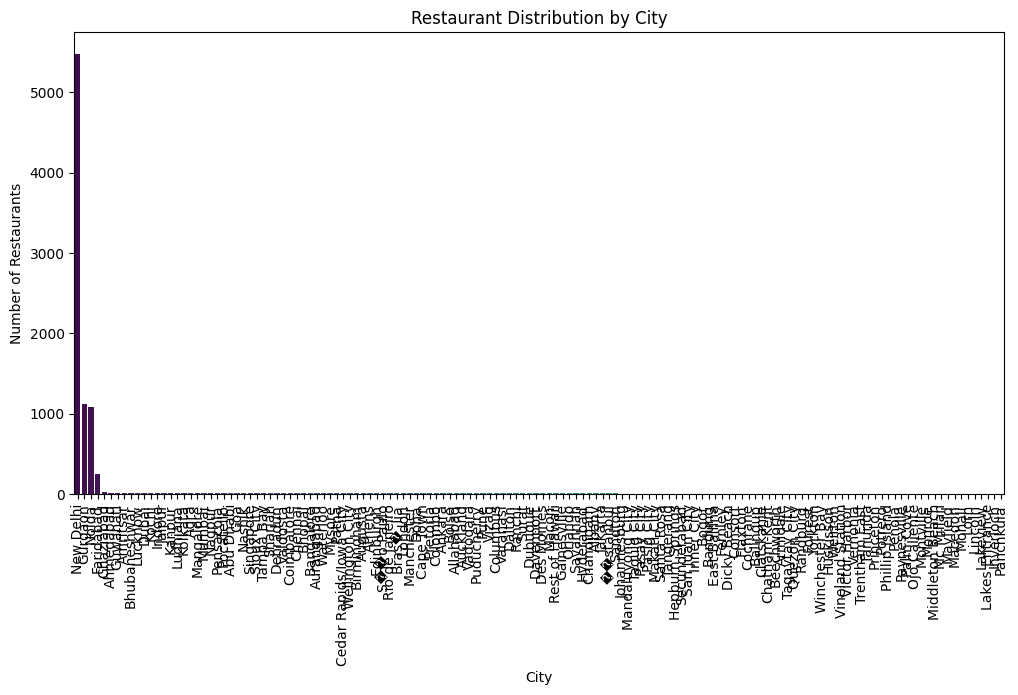

<ipython-input-8-6566c0266d0b>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_stats['City'], y=city_stats['Aggregate rating'], palette="coolwarm")


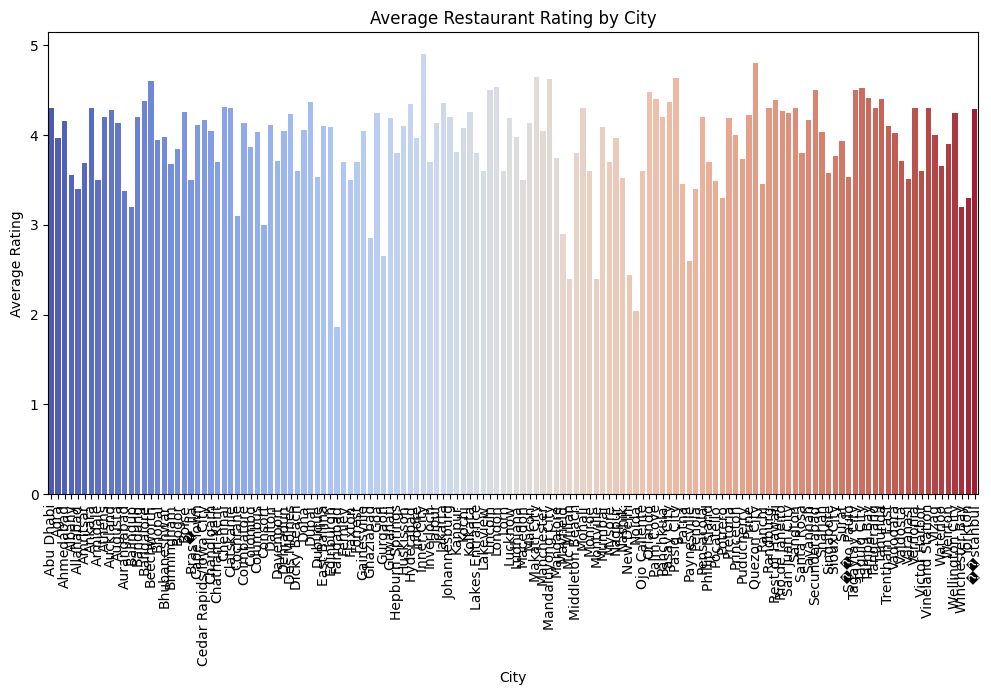

<ipython-input-8-6566c0266d0b>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_stats['City'], y=city_stats['Price range'], palette="magma")


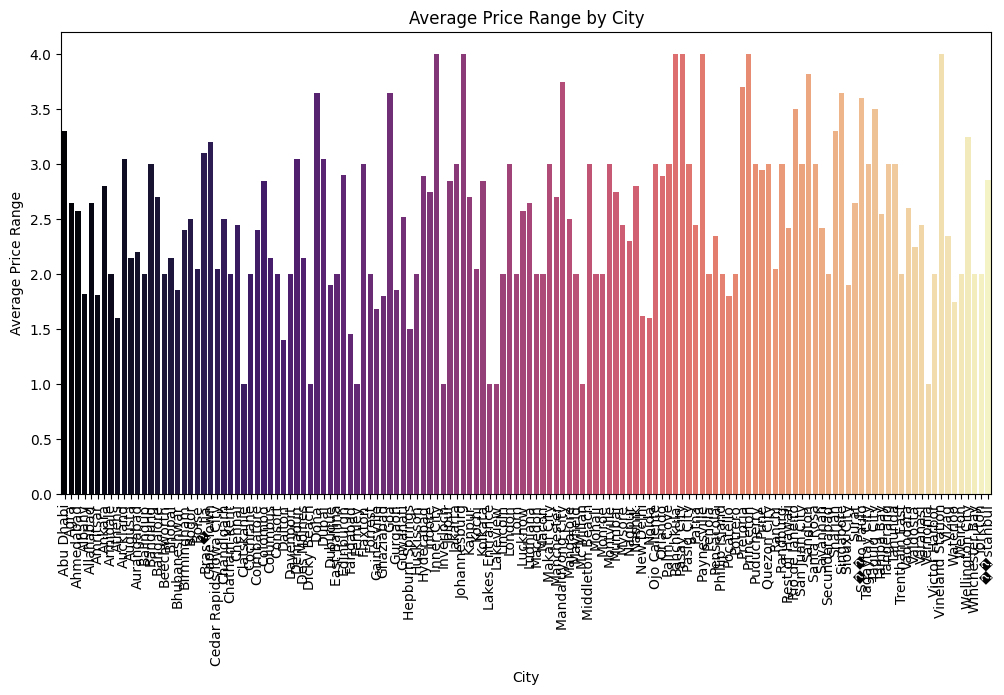

In [8]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import MarkerCluster

# Check for missing values in location-related columns
df.dropna(subset=['Latitude', 'Longitude', 'City', 'Price range', 'Cuisines', 'Aggregate rating'], inplace=True)

# Create a map with restaurant locations
restaurant_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# Add markers
marker_cluster = MarkerCluster().add_to(restaurant_map)

for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['City']} - {row['Cuisines']} - Rating: {row['Aggregate rating']}",
    ).add_to(marker_cluster)

# Save the map as an HTML file
restaurant_map.save("restaurant_map.html")
print("Map saved as restaurant_map.html")

# Group restaurants by city and analyze concentration
city_counts = df['City'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.title("Restaurant Distribution by City")
plt.show()

# Calculate average ratings and price ranges by city
city_stats = df.groupby('City').agg({'Aggregate rating': 'mean', 'Price range': 'mean'}).reset_index()

# Plot average ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=city_stats['City'], y=city_stats['Aggregate rating'], palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Average Restaurant Rating by City")
plt.show()

# Plot average price ranges
plt.figure(figsize=(12, 6))
sns.barplot(x=city_stats['City'], y=city_stats['Price range'], palette="magma")
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Average Price Range")
plt.title("Average Price Range by City")
plt.show()
